Document splitting is a crucial preprocessing step for many applications, involving breaking down large texts into smaller, manageable chunks. This process offers several benefits:

*   Ensuring consistent processing of varying document lengths.
*   Overcoming input size limitations of models.
*   Improving the quality of text representations used in retrieval systems.
*   Enhancing retrieval precision by allowing for more precise matching of queries to relevant document sections.
*   Optimising computational resources through more memory-efficient processing and better parallelisation.

**Key Concepts**

*   Text splitters divide documents into smaller chunks for downstream applications.
*   There are several strategies for splitting documents, each with its own advantages.

**Approaches to Document Splitting**

*   **Length-based Splitting**:
    *   This straightforward approach splits documents based on length, ensuring that each chunk does not exceed a specified size limit.
    *   It provides consistent chunk sizes and is easily adaptable to different model requirements.
    *   Types include:
        *   **Token-based splitting**: Splits text based on the number of tokens, useful when working with language models.
        *   **Character-based splitting**: Splits text based on the number of characters, which can be more consistent across different types of text.
    *   LangChain's `CharacterTextSplitter` can be used for token-based splitting.

*   **Text-structured based Splitting**:
    *   This approach leverages the natural hierarchical structure of text, such as paragraphs, sentences, and words.
    *   It maintains natural language flow and semantic coherence within splits, adapting to varying levels of text granularity.
    *   LangChain's `RecursiveCharacterTextSplitter` attempts to keep larger units (e.g., paragraphs) intact, moving to the next level (e.g., sentences) if a unit exceeds the chunk size, down to the word level if necessary.

*   **Document-structured based Splitting**:
    *   This method splits documents based on their inherent structure, such as HTML, Markdown, or JSON files.
    *   It preserves the logical organisation of the document, maintains context within each chunk, and can be more effective for downstream tasks like retrieval or summarisation.
    *   Examples include splitting:
        *   Markdown based on headers.
        *   HTML using tags.
        *   JSON by object or array elements.
        *   Code by functions, classes, or logical blocks.

*   **Semantic meaning based Splitting**:
    *   This method directly analyses the text's semantics, unlike other approaches that use document or text structure as proxies for semantic meaning.
    *   It splits text when there are significant changes in text meaning.
    *   It can be implemented using a sliding window approach to generate embeddings and compare them to find significant differences, indicating potential "break points" between semantic sections.
    *   This technique helps create chunks that are more semantically coherent.

**In summary**, document splitting is a crucial step in preparing text data for various AI applications. There are multiple approaches to splitting, and each offers different advantages for working with text. Length-based splitting is the most intuitive strategy; text-structured splitting takes into account the way that text is organised in terms of paragraphs, sentences, etc.; document-structured splitting is useful when the document has its own formal structure; and semantic splitting can be used to find meaningful 'break points' in the document based on the actual meaning of the text.

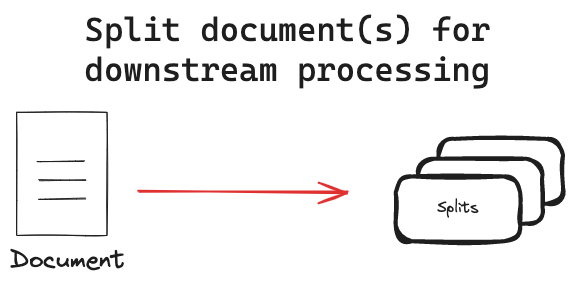

In [35]:
from langchain_text_splitters import CharacterTextSplitter
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name="cl100k_base", 
    chunk_size=400, chunk_overlap=10, separator=""
)

document = """
**In summary**, document splitting is a crucial step in preparing text data for various AI applications.\n\tThere are multiple approaches to splitting, and each offers different advantages for working with text. Length-based splitting is the most intuitive strategy; text-structured splitting takes into account the way that text is organised in terms of paragraphs, sentences, etc.; document-structured splitting is useful when the document has its own formal structure; and semantic splitting can be used to find meaningful 'break points' in the document based on the actual meaning of the text."""
texts = text_splitter.split_text(document)

print(len(texts))
for t in texts:
    print(t)

2
**In summary**, document splitting is a crucial step in preparing text data for various AI applications.
	There are multiple approaches to splitting, and each offers different advantages for working with text. Length-based splitting is the most intuitive strategy; text-structured splitting takes into account the way that text is organised in terms of paragraphs, sentences, etc.; document-structur
t-structured splitting is useful when the document has its own formal structure; and semantic splitting can be used to find meaningful 'break points' in the document based on the actual meaning of the text.


In [38]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=0)

document = """
PaliGemma 2 and PaliGemma are lightweight open vision-language models (VLM) inspired by PaLI-3, and based on open components like the SigLIP vision model and the Gemma language model. PaliGemma takes both images and text as inputs and can answer questions about images with detail and context, meaning that PaliGemma can perform deeper analysis of images and provide useful insights, such as captioning for images and short videos, object detection, and reading text embedded within images.
PaliGemma 2 is available in 3B, 10B, and 28B parameter sizes, which are based on Gemma 2 2B, 9B, and 27B models, respectively. The original PaliGemma models are available in the 3B size. For more information on Gemma model variants, see the Gemma models list. PaliGemma model variants support different pixel resolutions for image inputs, including 224 x 224, 448 x 448, and 896 x 896 pixels.
"""

texts = text_splitter.split_text(document)
print(len(texts))
for t in texts:
    print(t)

1
PaliGemma 2 and PaliGemma are lightweight open vision-language models (VLM) inspired by PaLI-3, and based on open components like the SigLIP vision model and the Gemma language model. PaliGemma takes both images and text as inputs and can answer questions about images with detail and context, meaning that PaliGemma can perform deeper analysis of images and provide useful insights, such as captioning for images and short videos, object detection, and reading text embedded within images.
PaliGemma 2 is available in 3B, 10B, and 28B parameter sizes, which are based on Gemma 2 2B, 9B, and 27B models, respectively. The original PaliGemma models are available in the 3B size. For more information on Gemma model variants, see the Gemma models list. PaliGemma model variants support different pixel resolutions for image inputs, including 224 x 224, 448 x 448, and 896 x 896 pixels.
